# importing Libraries

In [128]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.4 MB/s eta 0:00:00


In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# Data Understanding

In [97]:
df = pd.read_csv('/content/hotel_bookings.csv',na_values=['Undefined','No-Show'])

In [98]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [100]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [101]:
df.isna().mean().sort_values(ascending=False)*100

,0
company,94.306893
agent,13.686238
reservation_status,1.010972
meal,0.979144
country,0.408744
distribution_channel,0.004188
children,0.003350
market_segment,0.001675
stays_in_weekend_nights,0.000000
arrival_date_day_of_month,0.000000


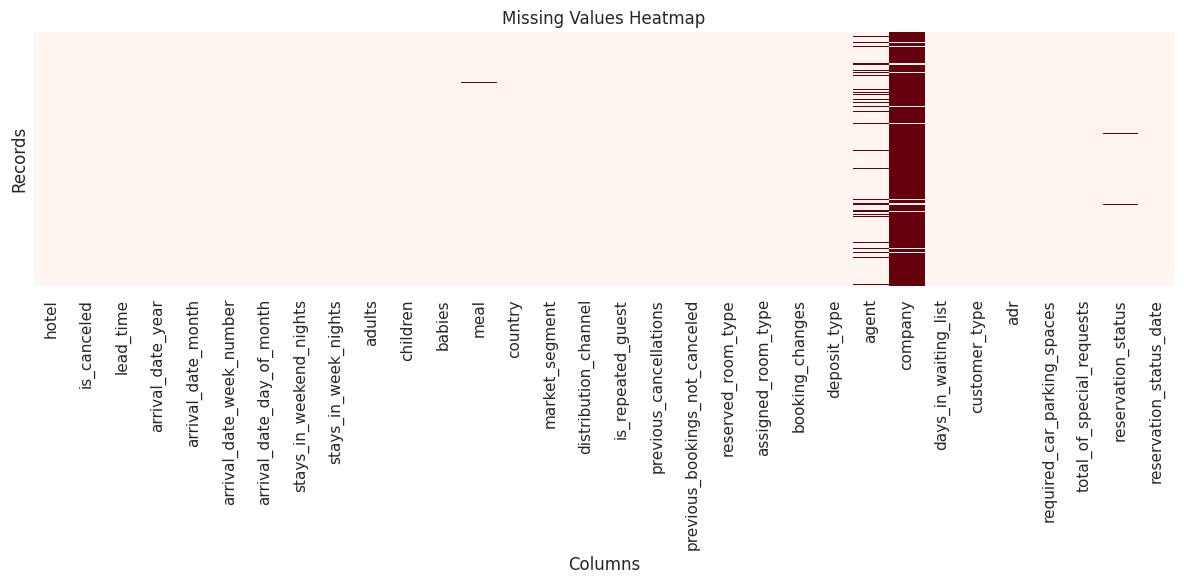

In [102]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='Reds', yticklabels=False)
plt.title("Missing Values Heatmap")
plt.xlabel("Columns")
plt.ylabel("Records")
plt.tight_layout()
plt.show()

# Data Cleaning

## Handling Missing Values

In [103]:
df.drop('company', axis=1,inplace=True)

In [104]:
imputer1 = SimpleImputer(strategy='mean')
df['agent'] = imputer1.fit_transform(df[['agent']]).flatten()

imputer2 = SimpleImputer(strategy='most_frequent')
df['country'] = imputer2.fit_transform(df[['country']]).flatten()

In [105]:
df.dropna(inplace=True)

In [106]:
df.isna().mean().sort_values(ascending=False)*100

,0
hotel,0.0
is_canceled,0.0
lead_time,0.0
arrival_date_year,0.0
arrival_date_month,0.0
arrival_date_week_number,0.0
arrival_date_day_of_month,0.0
stays_in_weekend_nights,0.0
stays_in_week_nights,0.0
adults,0.0


## Drop Duplicates

In [107]:
df.duplicated().sum()

np.int64(31148)

In [108]:
df.drop_duplicates(inplace=True)

## Anomaly Dedection

In [109]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,85863.000000,85863.000000,85863.000000,85863.000000,85863.000000,85863.000000,85863.000000,85863.000000,85863.000000,85863.000000,85863.000000,85863.000000,85863.000000,85863.000000,85863.000000,85863.000000,85863.000000,85863.000000,85863.000000
mean,0.267007,80.175640,2016.210463,26.877561,15.808812,1.001537,2.616936,1.878376,0.138814,0.010750,0.039109,0.030747,0.185610,0.269953,92.516638,0.733599,106.435480,0.085206,0.701851
std,0.442398,86.231562,0.686538,13.632540,8.831816,1.027049,2.035829,0.627409,0.455216,0.113448,0.193855,0.371920,1.739087,0.726785,104.288050,9.950751,54.980586,0.283042,0.832795
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,72.250000,0.000000,0.000000
50%,0.000000,50.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000,98.330000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,0.000000,134.100000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,3.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


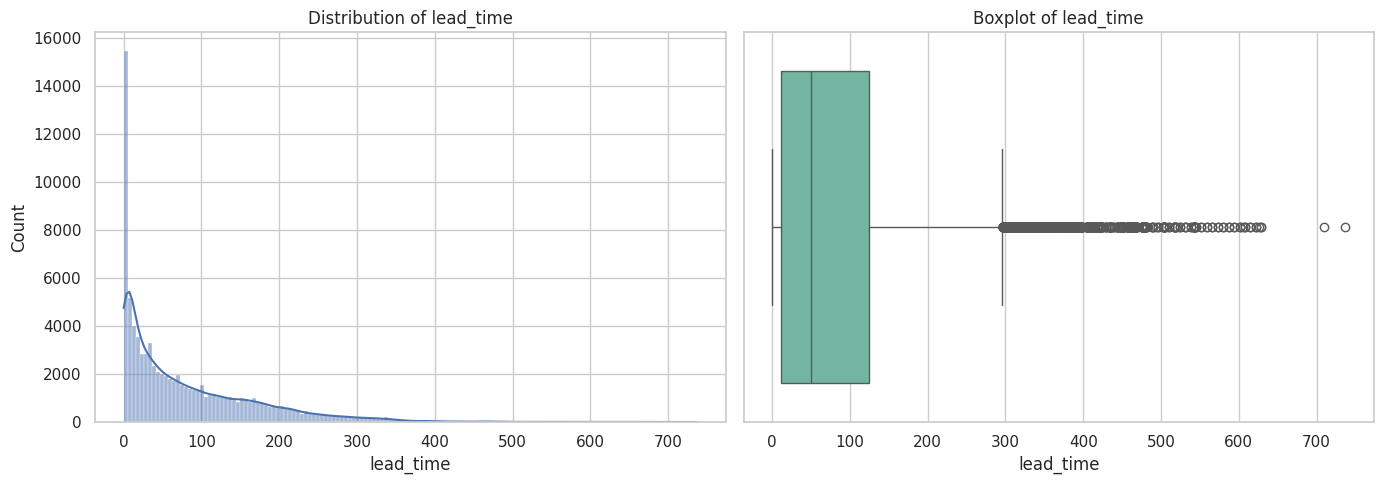

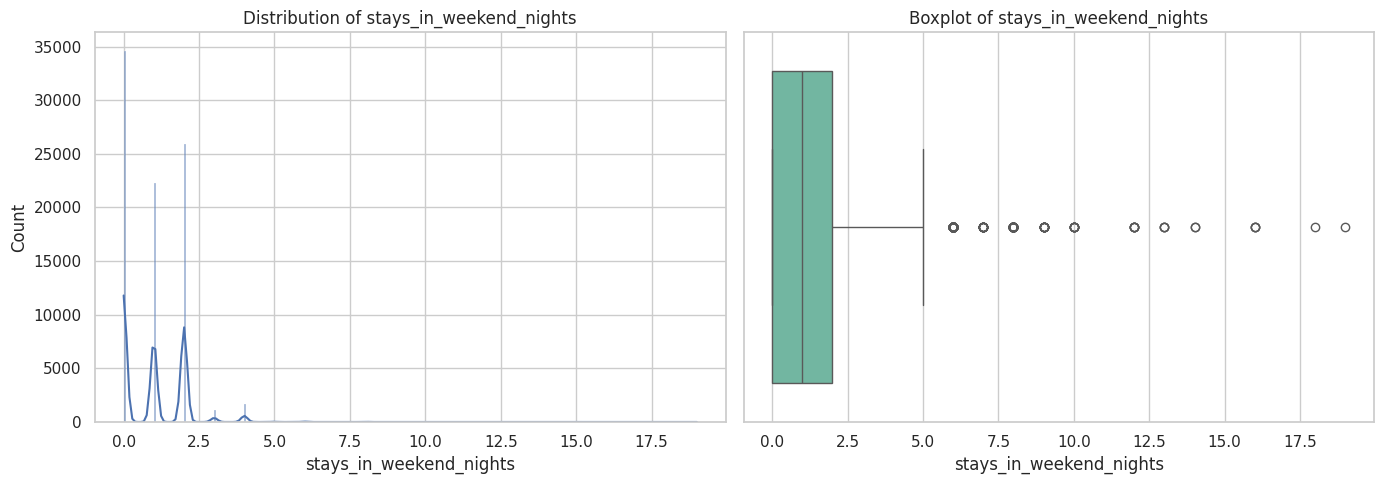

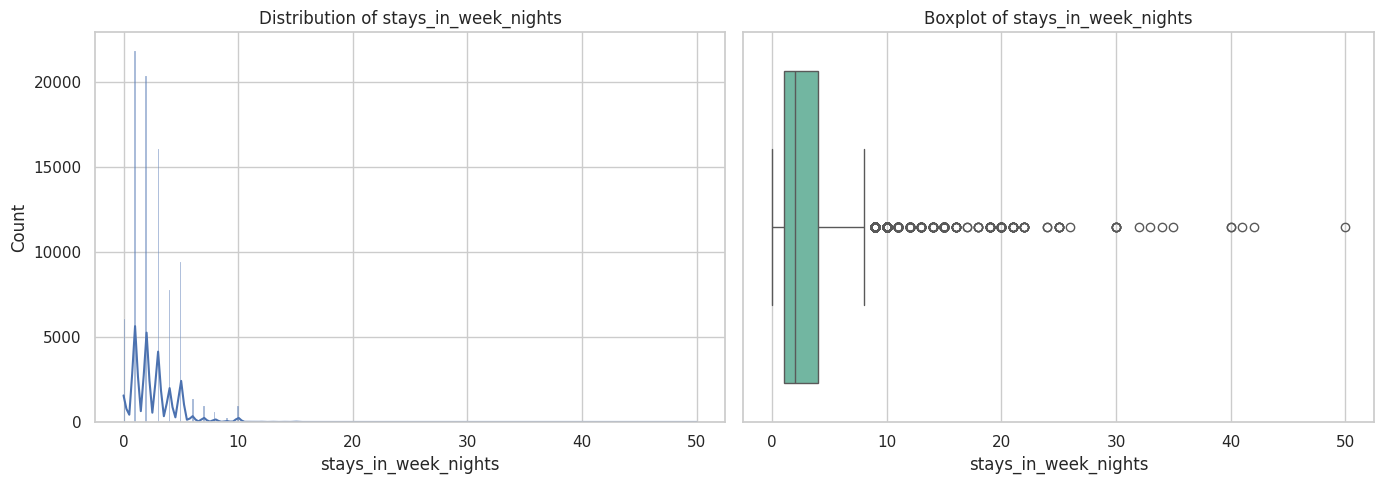

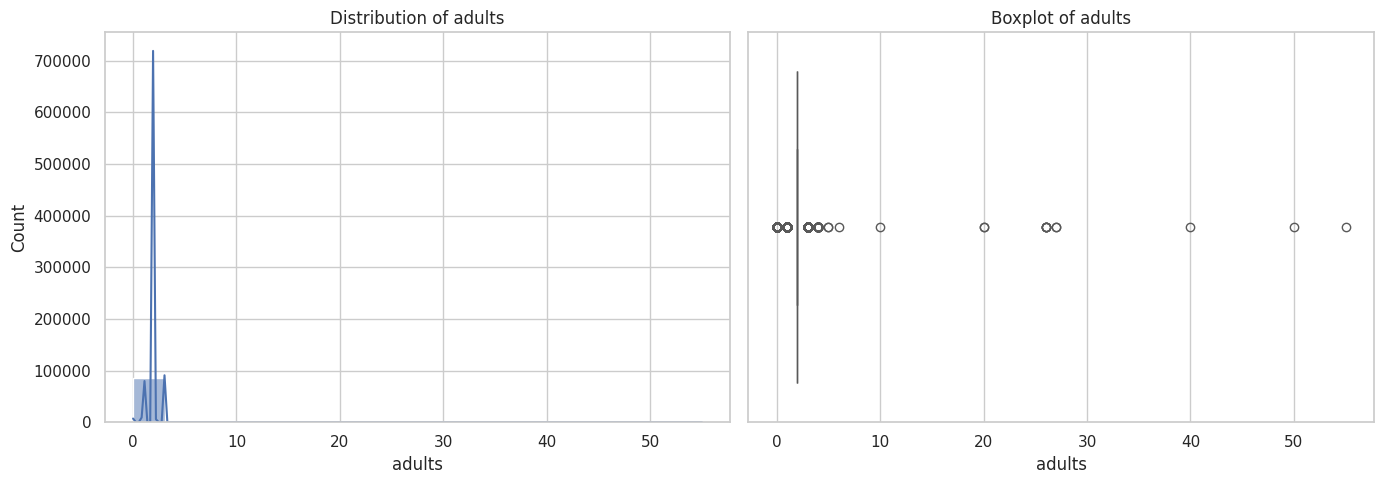

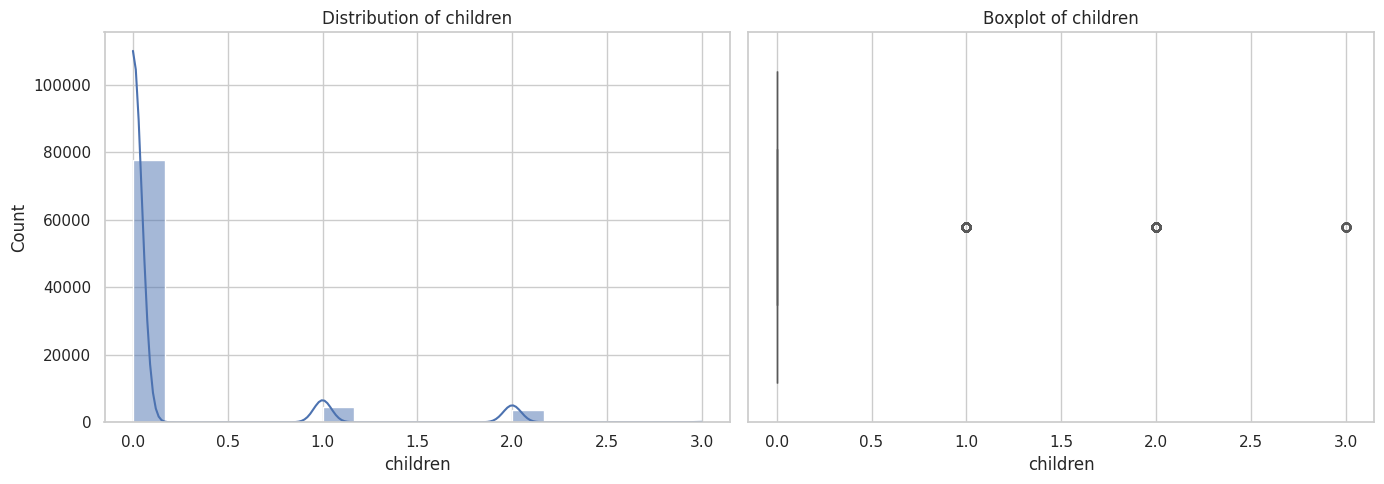

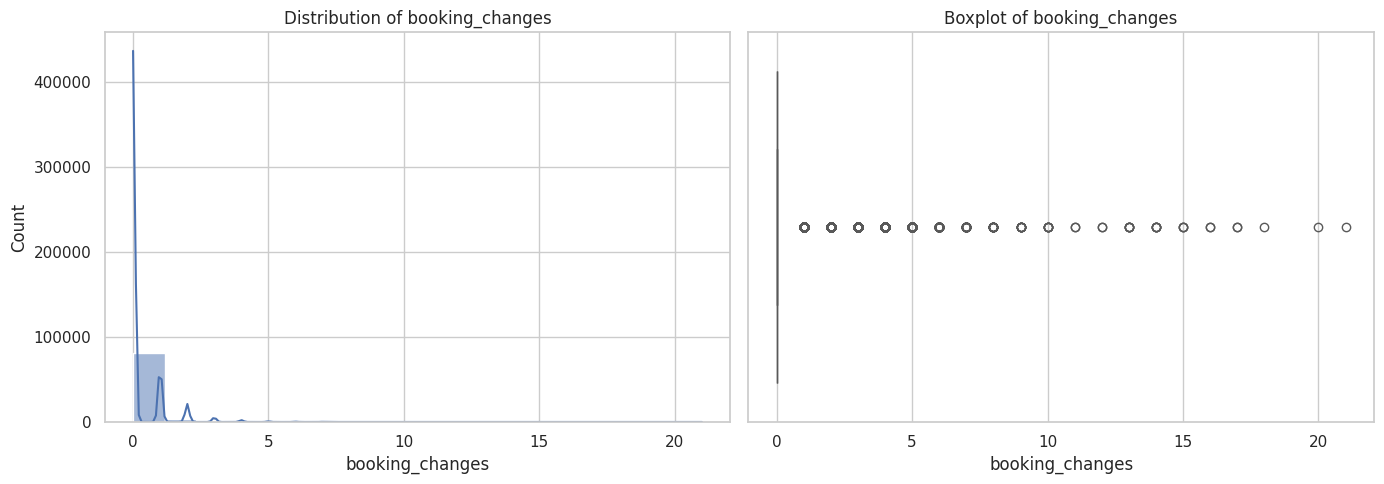

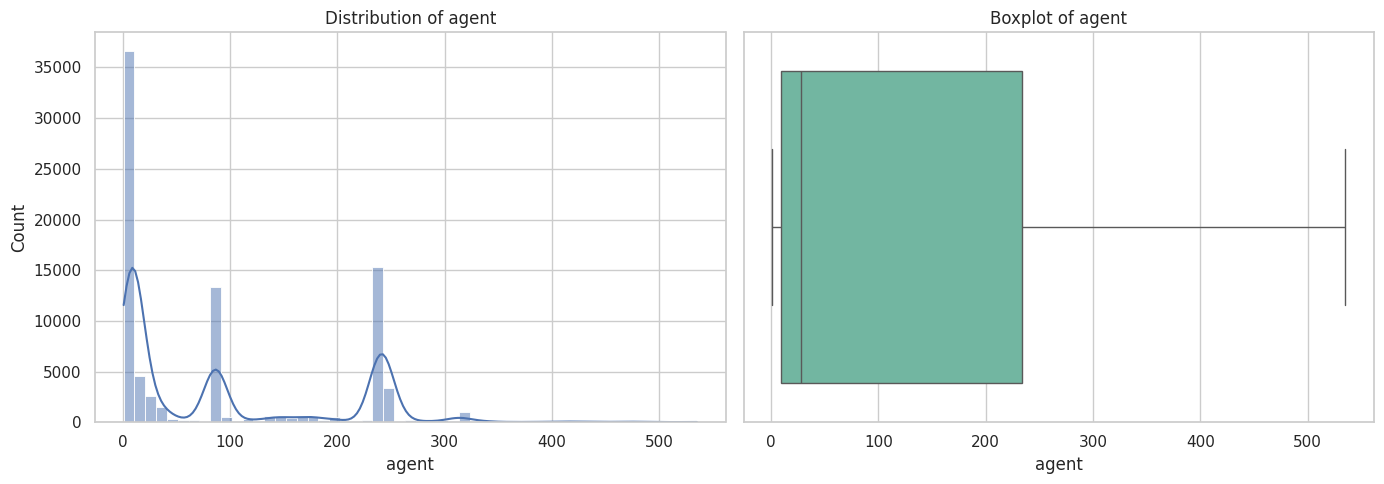

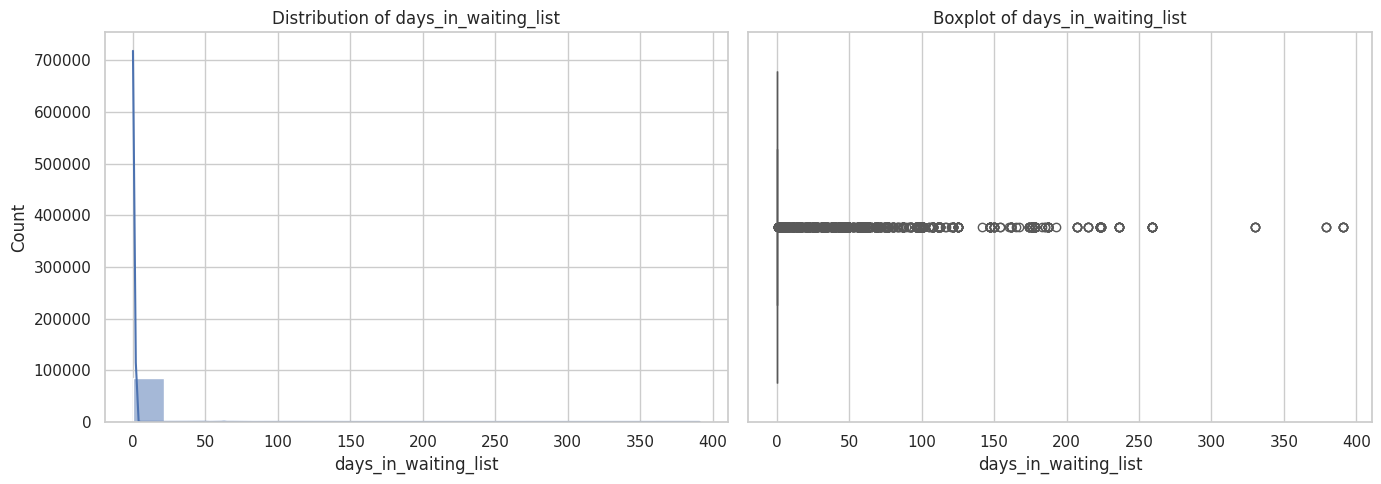

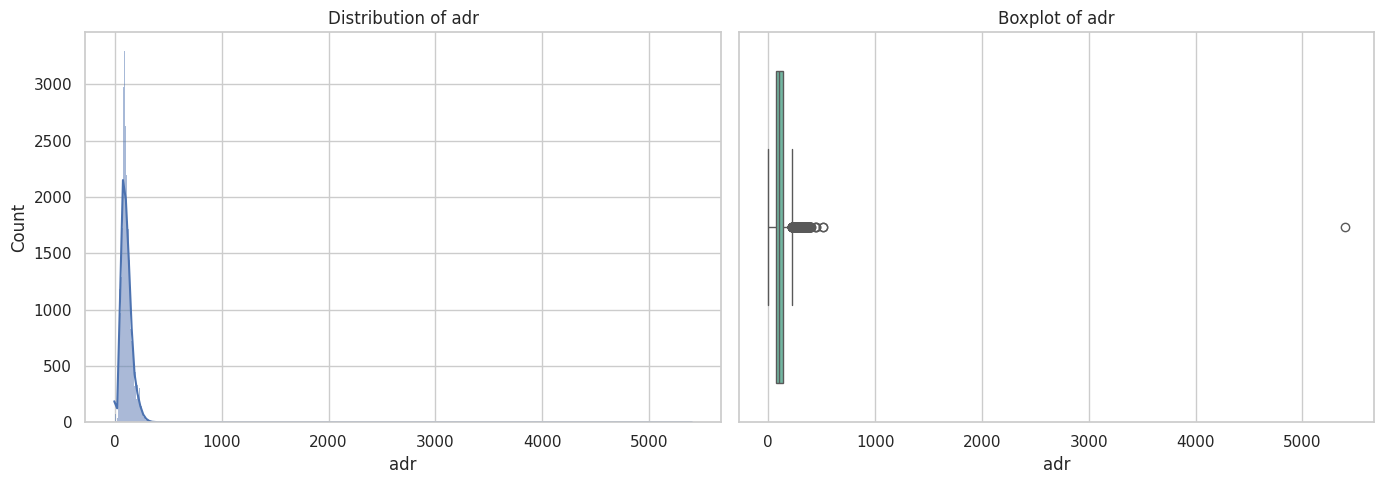

In [110]:
anomly_cols = ['lead_time','stays_in_weekend_nights','stays_in_week_nights','adults','children','booking_changes','agent','days_in_waiting_list','adr']

sns.set(style="whitegrid")

for col in anomly_cols:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    sns.histplot(data=df, x=col, kde=True, ax=axes[0], palette='Set2')
    axes[0].set_title(f"Distribution of {col}")

    sns.boxplot(data=df, x=col, ax=axes[1], palette='Set2')
    axes[1].set_title(f"Boxplot of {col}")

    plt.tight_layout()
    plt.show()


In [111]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [112]:
for col in anomly_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


In [113]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,43606.000000,43606.000000,43606.000000,43606.000000,43606.000000,43606.000000,43606.000000,43606.0,43606.0,43606.000000,43606.000000,43606.000000,43606.000000,43606.0,43606.000000,43606.0,43606.000000,43606.000000,43606.000000
mean,0.282415,74.322731,2016.192382,26.602555,15.747007,0.963652,2.448081,2.0,0.0,0.005504,0.016603,0.023758,0.033826,0.0,87.503108,0.0,98.591060,0.077627,0.725772
std,0.450179,71.779991,0.692368,13.728019,8.876033,0.884493,1.496056,0.0,0.0,0.074602,0.127781,0.404407,0.474583,0.0,105.216442,0.0,37.513713,0.268784,0.803170
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,2.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,15.000000,2016.000000,15.000000,8.000000,0.000000,1.000000,2.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,9.000000,0.0,74.800000,0.000000,0.000000
50%,0.000000,51.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,14.000000,0.0,95.365000,0.000000,1.000000
75%,1.000000,117.000000,2017.000000,37.000000,24.000000,2.000000,3.000000,2.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,240.000000,0.0,123.000000,0.000000,1.000000
max,1.000000,296.000000,2017.000000,53.000000,31.000000,4.000000,6.000000,2.0,0.0,2.000000,1.000000,26.000000,25.000000,0.0,531.000000,0.0,202.500000,3.000000,5.000000


# Feature Engineering

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43606 entries, 4 to 119388
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           43606 non-null  object 
 1   is_canceled                     43606 non-null  int64  
 2   lead_time                       43606 non-null  int64  
 3   arrival_date_year               43606 non-null  int64  
 4   arrival_date_month              43606 non-null  object 
 5   arrival_date_week_number        43606 non-null  int64  
 6   arrival_date_day_of_month       43606 non-null  int64  
 7   stays_in_weekend_nights         43606 non-null  int64  
 8   stays_in_week_nights            43606 non-null  int64  
 9   adults                          43606 non-null  int64  
 10  children                        43606 non-null  float64
 11  babies                          43606 non-null  int64  
 12  meal                            4360

In [115]:
obj_cols = df.select_dtypes(include='object').columns
obj_cols

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

In [116]:
df['reservation_status_date'].value_counts()

,count
reservation_status_date,
2016-02-14,153
2016-11-20,120
2017-02-15,117
2016-02-29,112
2017-02-12,110
...,...
2015-04-05,1
2015-03-29,1
2015-01-20,1


In [117]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [118]:
df['reservation_status_date'].dt.year.value_counts()

,count
reservation_status_date,
2016,21895
2017,14594
2015,7111
2014,6


In [119]:
df['reservation_status_date_year']   = df['reservation_status_date'].dt.year
df['reservation_status_date_month']  = df['reservation_status_date'].dt.month
df['reservation_status_date_day']    = df['reservation_status_date'].dt.day

df.drop('reservation_status_date',axis=1,inplace=True)

In [120]:
df['total_guests'] = df['adults'] + df['children'] + df['babies']
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['is_family'] = df['total_guests'].apply(lambda x: 1 if x > 2 else 0)

df.drop(['adults','children','babies'],axis=1,inplace=True)

In [121]:
df.shape

(43606, 33)

# PreProcessing

## Data Spliting

In [122]:
X = df.drop('is_canceled',axis=1)
y = df['is_canceled'].copy()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2, stratify=y)

## Data Scaling

In [123]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,...,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date_year,reservation_status_date_month,reservation_status_date_day,total_guests,total_nights,is_family
count,43606.000000,43606.000000,43606.000000,43606.000000,43606.000000,43606.000000,43606.000000,43606.000000,43606.000000,43606.000000,...,43606.0,43606.000000,43606.000000,43606.000000,43606.000000,43606.000000,43606.000000,43606.000000,43606.000000,43606.000000
mean,0.282415,74.322731,2016.192382,26.602555,15.747007,0.963652,2.448081,0.016603,0.023758,0.033826,...,0.0,98.591060,0.077627,0.725772,2016.171330,6.206027,15.583475,2.005504,3.411732,0.005458
std,0.450179,71.779991,0.692368,13.728019,8.876033,0.884493,1.496056,0.127781,0.404407,0.474583,...,0.0,37.513713,0.268784,0.803170,0.684806,3.245944,8.762024,0.074602,1.943661,0.073677
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,2014.000000,1.000000,1.000000,2.000000,0.000000,0.000000
25%,0.000000,15.000000,2016.000000,15.000000,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.0,74.800000,0.000000,0.000000,2016.000000,3.000000,8.000000,2.000000,2.000000,0.000000
50%,0.000000,51.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,0.000000,0.000000,0.000000,...,0.0,95.365000,0.000000,1.000000,2016.000000,6.000000,15.000000,2.000000,3.000000,0.000000
75%,1.000000,117.000000,2017.000000,37.000000,24.000000,2.000000,3.000000,0.000000,0.000000,0.000000,...,0.0,123.000000,0.000000,1.000000,2017.000000,9.000000,23.000000,2.000000,4.000000,0.000000
max,1.000000,296.000000,2017.000000,53.000000,31.000000,4.000000,6.000000,1.000000,26.000000,25.000000,...,0.0,202.500000,3.000000,5.000000,2017.000000,12.000000,31.000000,4.000000,10.000000,1.000000


In [124]:
obj_cols = X_train.select_dtypes(include='object').columns
num_cols = X_train.select_dtypes(exclude='object').columns

In [125]:
num_cols

Index(['lead_time', 'arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status_date_year',
       'reservation_status_date_month', 'reservation_status_date_day',
       'total_guests', 'total_nights', 'is_family'],
      dtype='object')

In [126]:
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [131]:
for col in obj_cols:
  print(df[col].value_counts())
  print('-'*20)

hotel
City Hotel      27722
Resort Hotel    15884
Name: count, dtype: int64
--------------------
arrival_date_month
August       4786
July         4769
May          4461
April        4170
June         4037
March        3940
October      3553
September    3513
February     3092
December     2549
November     2481
January      2255
Name: count, dtype: int64
--------------------
meal
BB    32976
SC     6982
HB     3513
FB      135
Name: count, dtype: int64
--------------------
country
PRT    11839
GBR     5492
FRA     5262
ESP     3709
DEU     3126
       ...  
NCL        1
ATF        1
SLE        1
SLV        1
ETH        1
Name: count, Length: 161, dtype: int64
--------------------
market_segment
Online TA        29104
Offline TA/TO     7353
Direct            5045
Groups            1416
Corporate          454
Complementary      232
Aviation             2
Name: count, dtype: int64
--------------------
distribution_channel
TA/TO        37597
Direct        5377
Corporate      621
GDS      

In [127]:
ordinal = OrdinalEncoder()
ord_cols = ['arrival_date_month','reserved_room_type','assigned_room_type']
X_train[ord_cols] = ordinal.fit_transform(X_train[ord_cols])
X_test[ord_cols] = ordinal.transform(X_test[ord_cols])

In [ ]:
high_cardinality = [col for col obj_cols if col not in ord_cols]
target_enc = TargetEncoder(cols=high_cardinality)
X_train[high_cardinality] = target_enc.fit_transform(X_train[high_cardinality], y_train)
X_test[high_cardinality] = target_enc.transform(X_test[high_cardinality])